# Prerequisites 
* Files ../../datasets/V1LGN_spks_CQuinn_(pre/post/novel).feather -- can be generated using notebook (`preprocessing-notebooks/Explorating data + preprocessing .ipynb`)
* DI analysis on the dataset V1RSC-- pre/post/novel 

In [2]:
import glob 
import sys 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib
import pandas as pd 


sys.path.append('../notebooks/lasso-method/')
sys.path.append('../code/')
sys.path.append('./')
from utils import * 

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


os.makedirs('output', exist_ok=True)

## V1RSC

In [3]:
import pandas as pd 


pre, post, novel = ( pd.read_feather('../../datasets/V1RSC_spks_CQuinn_pre.feather'), 
                   pd.read_feather('../../datasets/V1RSC_spks_CQuinn_post.feather'),
                   pd.read_feather('../../datasets/V1RSC_spks_CQuinn_novel.feather'),) 

pre_units, post_units, novel_units = pre['id'].unique(), post['id'].unique(), novel['id'].unique()
len(pre_units), len(post_units), len(novel_units)

(661, 536, 694)

In [4]:
pre_files = glob.glob('../../V1RSC/output__stimuli_0/DI_values/V1RSC_spks_CQuinn_pre/0/500_1500/lasso_0.5/*')
post_files = glob.glob('../../V1RSC/output__stimuli_0/DI_values/V1RSC_spks_CQuinn_post/0/500_1500/lasso_0.5/*')
novel_files = glob.glob('../../V1RSC/output__stimuli_0/DI_values/V1RSC_spks_CQuinn_novel/0/500_1500/lasso_0.5/*')

len(pre_files), len(post_files), len(novel_files)

(661, 536, 694)

## pre vs post 

Issues summary {'negative_di': 55, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 49, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 55, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 49, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 55, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 49, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 55, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 49, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
pre 294 RSC RSC
pre 267 RSC V1
pre 257 V1 RSC
pre 295 V1 V1
post 162 RSC RSC
post 182 RSC V1
post 122 V1 RSC
post 237 V1 V1

From RSC to RSC

From RSC to V1

From V1 to RSC

From V1 to V1

From RSC to RSC

From RSC to V1

From V1 to RSC

From V1 to V1


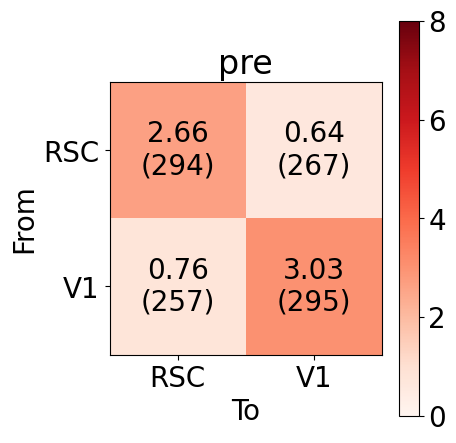

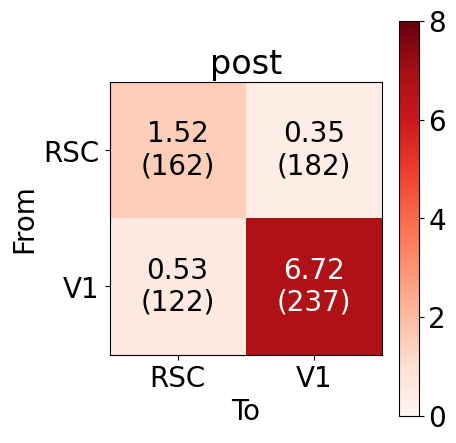

In [5]:


import analysis_utils
from all_stimuli_plots import read_plot_data

AREAS = ['RSC', 'V1']
STIMULI = [0]
STIMULUS_ID = 0
data = read_plot_data('', pre_files,post_files, areas=AREAS, stimuli=STIMULI)

for pre_post in ['pre', 'post']:
    for a1 in AREAS:
        for a2 in AREAS:
            print(pre_post, len(data['raw'][a1][a2][pre_post][STIMULUS_ID]), a1, a2)


plot_per_training(data, 'pre', training='pre', areas=AREAS, stimulus_id=0)
plt.tight_layout()
plt.savefig('output/V1RSC_pre.pdf', dpi=300)

plt.figure()

plot_per_training(data, 'post', training='post', areas=AREAS, stimulus_id=0)
plt.tight_layout()
plt.savefig('output/V1RSC_post.pdf', dpi=300)



From RSC to RSC
true_diff  [[-1.13846548]]
Proportion |Pre| / (|Pre| + |Post|) 0.6447368421052632
Using 1000000 runs
Significant - pre - 294, post - 162 with significance value 1.1e-05

From RSC to V1
true_diff  [[-0.28726965]]
Proportion |Pre| / (|Pre| + |Post|) 0.5946547884187082
Using 1000000 runs
Significant - pre - 267, post - 182 with significance value 8.8e-05

From V1 to RSC
true_diff  [[-0.22631863]]
Proportion |Pre| / (|Pre| + |Post|) 0.6781002638522428
Using 1000000 runs
Significant - pre - 257, post - 122 with significance value 0.030283

From V1 to V1
true_diff  [[3.68737143]]
Proportion |Pre| / (|Pre| + |Post|) 0.5545112781954887
Using 1000000 runs
Significant - pre - 295, post - 237 with significance value 0.0
pvals [2.20000000e-05 1.17333333e-04 3.02830000e-02 0.00000000e+00]


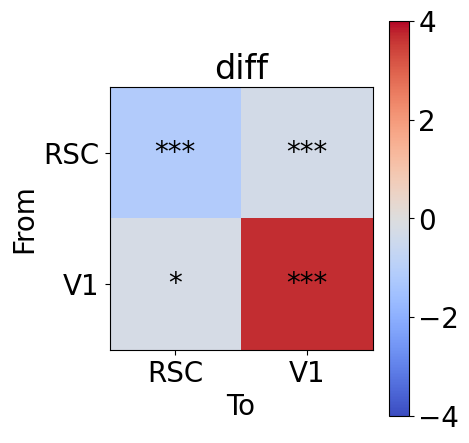

In [6]:
plot(data, 'diff', corrected=True, areas=AREAS, stimulus_id=0, max_=4., n_runs=1_000_000)
plt.tight_layout()
# plt.savefig('output/V1RSC_pre_post_diff.pdf', dpi=300)
